In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Brazil=gpd.read_file('BR_Municipios_2019.shp')


<AxesSubplot:>

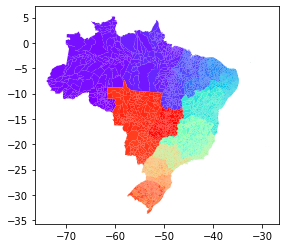

In [3]:
fig,ax = plt.subplots()

Brazil.plot(ax=ax,cmap='rainbow', figsize = (15,15))

In [4]:
sky = pd.read_excel('SAT output- Brazil_150to90 - ENG.xlsm', sheet_name='dados')

In [5]:
Brazil.rename(columns = {'CD_MUN':'CD IBGE'}, inplace = True)
sky['CD IBGE']=sky['CD IBGE'].astype(str)

In [32]:
Brazil_sky=Brazil.merge(sky[['CD IBGE','População (IBGE 2017)', 'Domicilios Total', 'Antena Final', 'Disp com Antena Alterada']], how='left', on='CD IBGE')

In [34]:
Brazil_sky

CD IBGE                 NM_MUN SIGLA_UF  AREA_KM2  \
0     1100015  Alta Floresta D'Oeste       RO  7067.025   
1     1100023              Ariquemes       RO  4426.571   
2     1100031                 Cabixi       RO  1314.352   
3     1100049                 Cacoal       RO  3792.892   
4     1100056             Cerejeiras       RO  2783.300   
...       ...                    ...      ...       ...   
5567  5222005            VianÃ³polis       GO   954.284   
5568  5222054        VicentinÃ³polis       GO   737.255   
5569  5222203               Vila Boa       GO  1060.172   
5570  5222302         Vila PropÃ­cio       GO  2181.583   
5571  5300108              BrasÃ­lia       DF  5760.783   

                                               geometry  \
0     POLYGON ((-62.22630 -11.89037, -62.20670 -11.8...   
1     POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...   
2     POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...   
3     POLYGON ((-61.50114 -11.30119, -61.50104 -11.2...   
4     POLYGON ((-61.51346 -13.28575, -61.51534 -13.2...   
...                                                 ...   
5567  POLYGON ((-48.53842 -16.75003, -48.54051 -16.7...   
5568  POLYGON ((-49.90713 -17.61460, -49.90588 -17.6...   
5569  POLYGON ((-47.07742 -15.06330, -47.07747 -15.0...   
5570  POLYGON ((-48.91463 -15.20939, -48.91462 -15.2...   
5571  POLYGON ((-47.81455 -16.04995, -47.81478 -16.0...   

      População (IBGE 2017)  Domicilios Total Antena Final  \
0                   25437.0            4697.0         90CM   
1                  107345.0           27361.0         90CM   
2                    6224.0             935.0         90CM   
3                   88507.0           22343.0         90CM   
4                   17934.0            5039.0         90CM   
...                     ...               ...          ...   
5567                13675.0            3427.0         60CM   
5568                 8397.0            2358.0         60CM   
5569                 5731.0            1254.0         60CM   
5570                 5690.0             581.0         60CM   
5571              3039444.0          853849.0         60CM   

      Disp com Antena Alterada  
0                    99.433472  
1                    99.762512  
2                    99.190687  
3                    99.368652  
4                    99.111991  
...                        ...  
5567                 99.941226  
5568                 99.927929  
5569                 99.929784  
5570                 99.907186  
5571                 99.940498  

[5572 rows x 9 columns]

<AxesSubplot:>

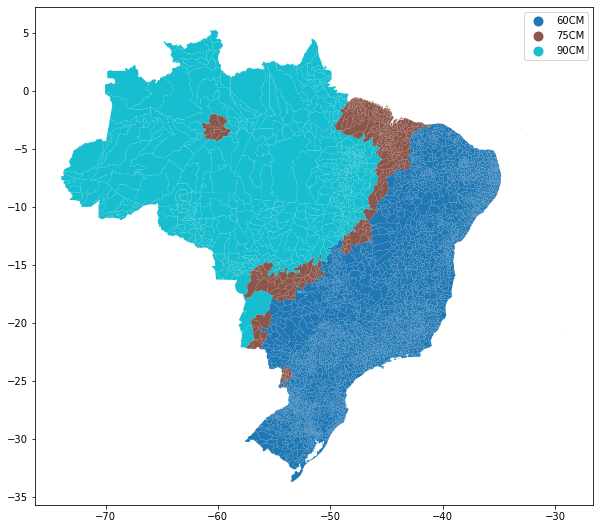

In [35]:

# Brazil_sky.plot('Antena Final', legend = True, figsize = (10,10))

In [36]:
# Brazil_sky.plot('Disp com Antena Alterada', legend=True, figsize=(150,150))

<AxesSubplot:>

In [37]:
# Brazil_sky.explore('Antena Final', legend = False)

In [38]:
anatel = pd.read_csv('Acessos_TV_Assinatura.csv', delimiter=";")



C:\Users\Sky\AppData\Local\Temp\ipykernel_9656\4183255087.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  anatel = pd.read_csv('Acessos_TV_Assinatura.csv', delimiter=";")


In [39]:
anatelAjuste=anatel[(anatel['Empresa']=='SKY/AT&T') & (anatel['Ano']==2022 ) & (anatel['Mês']==6 ) & (anatel['Tipo de Pessoa']=='Pessoa Física') & (anatel['Tipo Acesso TV']=='Padrão')].reset_index()

anatelAjuste.rename(columns = {'Código IBGE Município':'CD IBGE'}, inplace = True)

# anatelAjuste



In [40]:
anatelAjuste['CD IBGE'] = anatelAjuste['CD IBGE'].astype(str)
Brazil_sky_anatel = Brazil_sky.merge(anatelAjuste[['CD IBGE', 'Acessos']], how='left', on='CD IBGE')

# Brazil_sky_anatel

In [41]:
# Brazil_sky_anatel.plot('Acessos', legend=True, figsize=(150,150))

In [42]:
Brazil_sky_anatel['Acessos por Domicilios %'] = Brazil_sky_anatel['Acessos']/Brazil_sky_anatel['Domicilios Total']*100

In [43]:
Brazil_sky_anatel[Brazil_sky_anatel['Acessos por Domicilios %'] > 100]

CD IBGE                    NM_MUN SIGLA_UF  AREA_KM2  \
80    1300300                   Autazes       AM  7652.852   
176   1501758  Brejo Grande do Araguaia       PA  1288.477   
258   1506401       Santa Cruz do Arari       PA  1076.652   
273   1507466       SÃ£o JoÃ£o da Ponta       PA   195.918   
452   2100154   Ãgua Doce do MaranhÃ£o       MA   443.267   
614   2110039     Santa Luzia do ParuÃ¡       MA  1010.483   
959   2305100              Guaramiranga       CE    90.817   
1135  2405504         Jardim de Angicos       RN   254.022   
1211  2412559    SÃ£o Miguel do Gostoso       RN   431.444   
1220  2413359              Serra do Mel       RN   620.241   
1233  2414407                    Touros       RN   753.961   
1525  2605459       Fernando de Noronha       PE    18.609   
2076  2920700                    MaraÃº       BA   848.885   
2090  2921906                   MucugÃª       BA  2462.153   
2152  2926509         Ribeira do Amparo       BA   644.229   
2236  2933174                   Varzedo       BA   221.399   
2305  3105707               Barra Longa       MG   383.628   
2329  3108107                    Bonfim       MG   301.865   
2484  3121704      Diogo de Vasconcelos       MG   165.091   
2615  3132800    ItambÃ© do Mato Dentro       MG   380.340   
2732  3142304                     Moeda       MG   155.112   
2832  3150406        Piedade dos Gerais       MG   259.638   
2836  3150604                  Piracema       MG   280.335   
2913  3157401   Santa Cruz do Escalvado       MG   258.726   
3032  3167103                     Serro       MG  1217.813   
3616  3531209       Monte Alegre do Sul       SP   110.308   
3629  3532306       Natividade da Serra       SP   833.372   
3681  3536802                Pedra Bela       SP   158.587   
3741  3542305       RedenÃ§Ã£o da Serra       SP   309.441   
3846  3552007                 Silveiras       SP   414.782   
4136  4116208                  Morretes       PR   684.580   
4618  4300570                Alto Feliz       RS    78.846   
4641  4301750         BarÃ£o do Triunfo       RS   436.101   
4664  4302659                  Brochier       RS   105.353   
4697  4304713                    CaraÃ¡       RS   294.456   
4708  4305173       Cerro Grande do Sul       RS   324.908   
4715  4305447                  Chuvisca       RS   220.471   
4822  4310652                     Itati       RS   206.910   
4835  4311239       Lagoa Bonita do Sul       RS   109.281   
4849  4311775                  MaquinÃ©       RS   621.561   
4850  4311791                   MaratÃ¡       RS    82.063   
4853  4311981          Mariana Pimentel       RS   338.450   
4908  4314035               Pareci Novo       RS    57.373   
4910  4314068                Passa Sete       RS   304.833   
4941  4315172           ProtÃ¡sio Alves       RS   171.973   
5034  4320354          Sentinela do Sul       RS   282.130   
5038  4320552           SertÃ£o Santana       RS   252.013   
5052  4321352                   Tavares       RS   610.106   
5066  4321832          TrÃªs Forquilhas       RS   217.300   
5079  4322350           UniÃ£o da Serra       RS   131.154   

                                               geometry  \
80    POLYGON ((-59.43588 -3.49907, -59.43586 -3.499...   
176   POLYGON ((-48.19358 -5.69350, -48.19380 -5.693...   
258   POLYGON ((-49.44892 -0.58799, -49.45230 -0.581...   
273   POLYGON ((-48.00976 -0.85358, -48.01032 -0.851...   
452   POLYGON ((-42.25688 -2.99469, -42.24586 -2.974...   
614   POLYGON ((-45.92993 -2.54833, -45.92938 -2.546...   
959   POLYGON ((-39.02683 -4.22796, -39.02664 -4.227...   
1135  POLYGON ((-36.05641 -5.63855, -35.99241 -5.463...   
1211  POLYGON ((-35.64418 -5.11805, -35.64310 -5.118...   
1220  POLYGON ((-37.15630 -5.20421, -37.15649 -5.166...   
1233  POLYGON ((-35.46788 -5.17899, -35.46781 -5.179...   
1525  MULTIPOLYGON (((-32.39240 -3.82372, -32.39253 ...   
2076  POLYGON ((-39.27098 -14.13095, -39.27057 -14.1...   
2090  POLYGON ((-

In [44]:
# Brazil_sky_anatel[Brazil_sky_anatel['Acessos por Domicilios %'] <= 100].plot('Acessos por Domicilios %', legend=True, figsize=(20,20), k=10)

In [45]:
per_capita = pd.read_excel('PIB dos Municípios - base de dados 2010-2019.xls')

In [46]:
per_captita_2019 = per_capita[per_capita['Ano']==2019]
# per_captita_2019.rename(columns = {'Código do Município':'CD IBGE'}, inplace = True)
per_captita_2019['CD IBGE']=per_captita_2019['CD IBGE'].astype(str)
# per_captita_2019['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']

C:\Users\Sky\AppData\Local\Temp\ipykernel_9656\220563459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_captita_2019['CD IBGE']=per_captita_2019['CD IBGE'].astype(str)


In [47]:
Brazil_sky_anatel_PIB = Brazil_sky_anatel.merge(per_captita_2019[['CD IBGE', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']], how='left', on='CD IBGE')

In [48]:
# Brazil_sky_anatel_PIB.plot('Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)', legend=True, figsize=(20,20), k=10)

In [49]:
Brazil_sky_anatel_PIB['Antena Final']=Brazil_sky_anatel_PIB['Antena Final'].replace('60CM', 1)
Brazil_sky_anatel_PIB['Antena Final']=Brazil_sky_anatel_PIB['Antena Final'].replace('75CM', 2)
Brazil_sky_anatel_PIB['Antena Final']=Brazil_sky_anatel_PIB['Antena Final'].replace('90CM', 3)
Brazil_sky_anatel_PIB['Antena Final']=Brazil_sky_anatel_PIB['Antena Final'].replace('150CM', 4)



In [57]:
Brazil_sky_anatel_PIB[Brazil_sky_anatel_PIB['Antena Final']== 2].corr()

AREA_KM2  \
AREA_KM2                                            1.000000   
População (IBGE 2017)                               0.155731   
Domicilios Total                                    0.142947   
Antena Final                                             NaN   
Disp com Antena Alterada                            0.066715   
Acessos                                             0.217834   
Acessos por Domicilios %                           -0.033693   
Produto Interno Bruto per capita, \na preços co...  0.261500   

                                                    População (IBGE 2017)  \
AREA_KM2                                                         0.155731   
População (IBGE 2017)                                            1.000000   
Domicilios Total                                                 0.994840   
Antena Final                                                          NaN   
Disp com Antena Alterada                                        -0.110743   
Acessos                                                          0.931521   
Acessos por Domicilios %                                        -0.064709   
Produto Interno Bruto per capita, \na preços co...               0.090467   

                                                    Domicilios Total  \
AREA_KM2                                                    0.142947   
População (IBGE 2017)                                       0.994840   
Domicilios Total                                            1.000000   
Antena Final                                                     NaN   
Disp com Antena Alterada                                   -0.081134   
Acessos                                                     0.917729   
Acessos por Domicilios %                                   -0.083208   
Produto Interno Bruto per capita, \na preços co...          0.115281   

                                                    Antena Final  \
AREA_KM2                                                     NaN   
População (IBGE 2017)                                        NaN   
Domicilios Total                                             NaN   
Antena Final                                                 NaN   
Disp com Antena Alterada                                     NaN   
Acessos                                                      NaN   
Acessos por Domicilios %                                     NaN   
Produto Interno Bruto per capita, \na preços co...           NaN   

                                                    Disp com Antena Alterada  \
AREA_KM2                                                            0.066715   
População (IBGE 2017)                                              -0.110743   
Domicilios Total                                                   -0.081134   
Antena Final                                                             NaN   
Disp com Antena Alterada                                            1.000000   
Acessos                                                            -0.174730   
Acessos por Domicilios %                                           -0.309606   
Produto Interno Bruto per capita, \na preços co...                  0.354666   

                                                     Acessos  \
AREA_KM2                                            0.217834   
População (IBGE 2017)                               0.931521   
Domicilios Total                                    0.917729   
Antena Final                                             NaN   
Disp com Antena Alterada                           -0.174730   
Acessos                                             1.000000   
Acessos por Domicilios %                            0.113920   
Produto Interno Bruto per capita, \na preços co...  0.046926   

                                                    Acessos por Domicilios %  \
AREA_KM2                                                           -0.033693   
População (IBGE 2017)                                        